# Tutorial: Running your own urban data

Junjie Yu, Manchsster, 2024-05-08

Fisrt of all, we need to install Docker/Docker Desktop.

- [How to install Docker on Linux?](https://envdes.github.io/clmu-app/container/install_docker.html)
- [How to install Docker Desktop](https://www.docker.com/products/docker-desktop/)
  
Platform: arm64/amd64

## 1 Initialize pyclmuapp

- The inputfolder, outputfolder, logfolder, and scriptfolder will be checked in the current working directory.
- If the folder does not exist, it will be created.
- User can specify the folders by using the inputfolder, outputfolder, logfolder, and scriptfolder parameters.
- Inputfolder, outputfolder, logfolder, and scriptfolder parameters are optional.

In [1]:
from pyclmuapp import usp_clmu
import os

In [2]:
o = usp_clmu(
    pwd=os.getcwd(),)

Folder 'inputfolder' already exists.
Folder 'outputfolder' already exists.
Folder 'logfolder' already exists.
Folder 'scriptsfolder' already exists.


check what are in the urban surface data

In [3]:
o.surfdata_dict

{'CANYON_HWR': {'long_name': 'canyon height to width ratio',
  'units': 'unitless',
  'value': 1.13,
  'type': 'morphological'},
 'HT_ROOF': {'long_name': 'height of roof',
  'units': 'meters',
  'value': 21.3,
  'type': 'morphological'},
 'THICK_ROOF': {'long_name': 'thickness of roof',
  'units': 'meters',
  'value': 0.1469999998807907,
  'type': 'morphological'},
 'THICK_WALL': {'long_name': 'thickness of wall',
  'units': 'meters',
  'value': 0.2844499945640564,
  'type': 'morphological'},
 'WTLUNIT_ROOF': {'long_name': 'fraction of roof',
  'units': 'unitless',
  'value': 0.4,
  'type': 'morphological'},
 'WTROAD_PERV': {'long_name': 'fraction of pervious road',
  'units': 'unitless',
  'value': 0.35,
  'type': 'morphological'},
 'WIND_HGT_CANYON': {'long_name': 'height of wind in canyon',
  'units': 'meters',
  'value': 10.65,
  'type': 'morphological'},
 'NLEV_IMPROAD': {'long_name': 'number of impervious road layers',
  'units': 'unitless',
  'value': 2,
  'type': 'morphologica

## 2 Pull and run the clmu-app image

check what image will be used

In [4]:
o.image_name # do not change this if not necessary

'envdes/clmu-app:1.0'

pull envdes/clmu-app:1.0 to local if not pulled

In [27]:
o.docker(cmd="pull",
         cmdlogfile="None",) # This will pull the image from the docker hub
# other parameters are available, see the Python API documentation

1.0: Pulling from envdes/clmu-app
bb93aca2282a: Pulling fs layer
582d363feaed: Pulling fs layer
1a484759dca9: Pulling fs layer
81331aae7754: Pulling fs layer
980d15f7476f: Pulling fs layer
0d4d347baaeb: Pulling fs layer
71331a603772: Pulling fs layer
4f4fb700ef54: Pulling fs layer
81331aae7754: Waiting
980d15f7476f: Waiting
0d4d347baaeb: Waiting
8e64d824246d: Pulling fs layer
03f446ddd32d: Pulling fs layer
4f4fb700ef54: Waiting
71331a603772: Waiting
8e64d824246d: Waiting
03f446ddd32d: Waiting
582d363feaed: Verifying Checksum
582d363feaed: Download complete
1a484759dca9: Verifying Checksum
1a484759dca9: Download complete
980d15f7476f: Verifying Checksum
980d15f7476f: Download complete
bb93aca2282a: Verifying Checksum
bb93aca2282a: Download complete
bb93aca2282a: Pull complete
582d363feaed: Pull complete
1a484759dca9: Pull complete
71331a603772: Verifying Checksum
71331a603772: Download complete
4f4fb700ef54: Verifying Checksum
4f4fb700ef54: Download complete
8e64d824246d: Verifying Chec

Start the clmuapp

In [6]:
o.docker(cmd="start",
         cmdlogfile="None",)

myclmu



**folder and container**

after running a container (clmu) using `o.docker`, the floders will be binded to container

if you get the input data, bind them when initializing

<img src="./fig/folder.png" alt="Folder and container" width="500">

## 3 check the default configuration

`o.check_surf_data()` will show what is available in the surfdata_dict.

Please check below output to see:
1. what kind of urban parameter will need to run the single point model
2. The values list indicates different paramter in different level
   1. list of albedo indicate the albedo of visable and invisable solar bands (VIS,NIR)
   2. list of thermal paramters indicates the layer

In [3]:
o.check_surf_data()

{'CANYON_HWR': {'long_name': 'canyon height to width ratio',
  'units': 'unitless',
  'value': 1.13,
  'type': 'morphological'},
 'HT_ROOF': {'long_name': 'height of roof',
  'units': 'meters',
  'value': 21.3,
  'type': 'morphological'},
 'THICK_ROOF': {'long_name': 'thickness of roof',
  'units': 'meters',
  'value': 0.1469999998807907,
  'type': 'morphological'},
 'THICK_WALL': {'long_name': 'thickness of wall',
  'units': 'meters',
  'value': 0.2844499945640564,
  'type': 'morphological'},
 'WTLUNIT_ROOF': {'long_name': 'fraction of roof',
  'units': 'unitless',
  'value': 0.4,
  'type': 'morphological'},
 'WTROAD_PERV': {'long_name': 'fraction of pervious road',
  'units': 'unitless',
  'value': 0.35,
  'type': 'morphological'},
 'WALL_TO_PLAN_AREA_RATIO': {'long_name': 'ratio of wall area to plan area',
  'units': 'unitless',
  'value': 1.35,
  'type': 'morphological'},
 'WIND_HGT_CANYON': {'long_name': 'height of wind in canyon',
  'units': 'meters',
  'value': 10.65,
  'type': 

'check domain'
`o.check_domain_data()`

if you have your domain file, use `o.check_domain_data(usr_domain=your-filepath)`

other parameters:
- usr_domain (str): The path to the user-defined domain data file. The default is None,which - means using the default domain data (UK-Kin site).
- lat (float): The latitude of the domain. The default is None. Provide it to change to your interest point.
- lon (float): The longitude of the domain. The default is None. Provide it to change to your interest point.

In [4]:
o.check_domain_data()

**check the forcing file**

we need to provdie our own forcing data

if the forcing file is not in inputfolder/usp, then it will be copied to the inputfolder/usp

the forcing should be included:

1.  Zbot : Measurement height above ground m
2.  Prectmms : Precip_rate kg/m2/s
3.  Wind : Wind m/s
4.  LWdown : Downward longwave radiation at measurement height W/m2
5.  PSurf : Air pressure at measurement height Pa
6.  Qair : Specific humidity at measurement height 1
7.  Tair : Air temperature at measurement height K
8.  SWdown : Downward shortwave radiation at measurement height W/m2

Note: 
- Wind=sqrt(Wind_N^2 + Wind_E^2 )
- Prectmms=Snow+Rain

Make sure the forcing file is same as the protocols of CLM

In [5]:
o.check_forcing_data(
    usr_forcing="inputfolder/Urban-PLUMBER/datm_files/UK-Kin/CLM1PT_data/CTSM_DATM_UK-Kin_2002-2014.nc")

The file CTSM_DATM_UK-Kin_2002-2014.nc already exists.


To learn more? --> [CTSM docs](https://escomp.github.io/ctsm-docs/versions/master/html/users_guide/index.html).

## 4 run a case with o.caseconfig

the ouput file name will be return after `o.run()`

***Note!***: the first time you run it, you need to download some input data, which will consume a lot of time, affected by the network.

In [6]:
original = o.run(
            ouptname= "_clm.nc",
            case_name = "usp_case", 
            RUN_STARTDATE = "2012-08-08",
            STOP_OPTION = "days", 
            STOP_N = "10",
            #ATM_DOM = None, 
            #SURF = None, 
            #FORCING = None,
            #passward = "None",
            iflog = True,
            logfile = "log.log",
            run_tyep="usp-exec"#"case", when docker container is not start)
        )
original

The /Users/user/Documents/GitHub/pyclmuapp/inputfolder/usp/usp.sh already exists.


['/Users/user/Documents/GitHub/pyclmuapp/outputfolder/usp_case_clm0_2024-05-09_14-09-59_clm.nc']

Now, let's check output.

In [7]:
ds0 = o.nc_view(original[0])
ds0

<xarray.Dataset>
Dimensions:                          (levgrnd: 25, levlak: 10, levdcmp: 1,
                                      time: 481, hist_interval: 2, lndgrid: 1,
                                      levsoi: 20, cft: 2, glc_nec: 10,
                                      ltype: 9, natpft: 15, nvegwcs: 4)
Coordinates:
  * levgrnd                          (levgrnd) float32 0.01 0.04 ... 28.87 42.0
  * levlak                           (levlak) float32 0.05 0.6 ... 34.33 44.78
  * levdcmp                          (levdcmp) float32 1.0
  * time                             (time) datetime64[ns] 2012-08-08 ... 201...
Dimensions without coordinates: hist_interval, lndgrid, levsoi, cft, glc_nec,
                                ltype, natpft, nvegwcs
Data variables: (12/251)
    mcdate                           (time) int32 ...
    mcsec                            (time) int32 ...
    mdcur                            (time) int32 ...
    mscur                            (time) int32 ...
    nstep                            (time) int32 ...
    time_bounds                      (time, hist_interval) datetime64[ns] ...
    ...                               ...
    WBT_R                            (time, lndgrid) float32 ...
    WBT_U                            (time, lndgrid) float32 ...
    WIND                             (time, lndgrid) float32 ...
    ZBOT                             (time, lndgrid) float32 ...
    ZWT                              (time, lndgrid) float32 ...
    ZWT_PERCH                        (time, lndgrid) float32 ...
Attributes: (12/38)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 05/09/24 13:09:58
    source:                                    Community Land Model CLM4.0
    hostname:                                  clmu-app
    ...                                        ...
    ctype_urban_shadewall:                     73
    ctype_urban_impervious_road:               74
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          minute_30

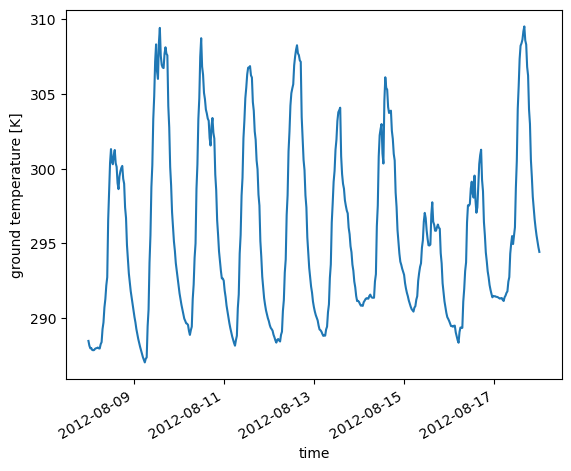

In [8]:
ds0['TG'].plot()

## 5 Change the surface data

In [9]:
action = {}
for var in o.surfdata_dict.keys():
    action[var] = o.surfdata_dict[var]['value']

In [10]:
action

{'CANYON_HWR': 1.13,
 'HT_ROOF': 21.3,
 'THICK_ROOF': 0.1469999998807907,
 'THICK_WALL': 0.2844499945640564,
 'WTLUNIT_ROOF': 0.4,
 'WTROAD_PERV': 0.35,
 'WALL_TO_PLAN_AREA_RATIO': 1.35,
 'WIND_HGT_CANYON': 10.65,
 'NLEV_IMPROAD': 2,
 'TK_ROOF': [1.2000000476837158,
  0.029999999329447746,
  0.15000000596046448,
  0.029999999329447746,
  0.029999999329447746,
  0.029999999329447746,
  0.03999999910593033,
  0.03999999910593033,
  0.03999999910593033,
  0.1599999964237213],
 'TK_WALL': [2.5210890769958496,
  2.5210890769958496,
  0.14880500733852386,
  2.1080260276794434,
  0.6771860122680664,
  0.6771860122680664,
  0.6771860122680664,
  1.59621000289917,
  2.2254879474639893,
  2.300661087036133],
 'TK_IMPROAD': [1.6699999570846558,
  0.5579000115394592,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'CV_ROOF': [1700000.0,
  1206.0,
  994000.0,
  1206.0,
  1206.0,
  1206.0,
  10080.0,
  10080.0,
  10080.0,
  609000.0],
 'CV_WALL': [1520734.0,
  1520734.0,
  138115.59375,
  

here we change the CANYON_HWR to 3

In [11]:
action['CANYON_HWR'] = 3.0

In [12]:
o.urban_vars_list

['CANYON_HWR',
 'HT_ROOF',
 'THICK_ROOF',
 'THICK_WALL',
 'WTLUNIT_ROOF',
 'WTROAD_PERV',
 'WALL_TO_PLAN_AREA_RATIO',
 'WIND_HGT_CANYON',
 'NLEV_IMPROAD',
 'TK_ROOF',
 'TK_WALL',
 'TK_IMPROAD',
 'CV_ROOF',
 'CV_WALL',
 'CV_IMPROAD',
 'EM_IMPROAD',
 'EM_PERROAD',
 'EM_ROOF',
 'EM_WALL',
 'ALB_IMPROAD_DIR',
 'ALB_IMPROAD_DIF',
 'ALB_PERROAD_DIR',
 'ALB_PERROAD_DIF',
 'ALB_ROOF_DIR',
 'ALB_ROOF_DIF',
 'ALB_WALL_DIR',
 'ALB_WALL_DIF',
 'T_BUILDING_MIN']

In [13]:
o.revise_surfdata(
    action=action,    # dict like result of o.check_surf_data() or o.surfdata_dict
    mode="replace", # optional; the default is "replace"
    usr_surfdata=None, # optional; the path to the new surfdata file, the default is "surfdata.nc" provided by pyclmuapp
    surfata_name="surface_replaced.nc" # optional; output file name, the default is "surfdata.nc"
)

In [14]:
o.surfdata

'surface_replaced.nc'

In [15]:
replace = o.run(
            ouptname= "_clm.nc",
            case_name = "usp_case", 
            RUN_STARTDATE = "2012-08-08",
            STOP_OPTION = "days", 
            STOP_N = "10",
            #ATM_DOM = None, 
            #SURF = None, 
            #FORCING = None,
            #passward = "None",
            iflog = True,
            logfile = "log.log",
            run_tyep="usp-exec"#"case", when docker container is not start)
        )
replace

The /Users/user/Documents/GitHub/pyclmuapp/inputfolder/usp/usp.sh already exists.


['/Users/user/Documents/GitHub/pyclmuapp/outputfolder/usp_case_clm0_2024-05-09_14-10-32_clm.nc']

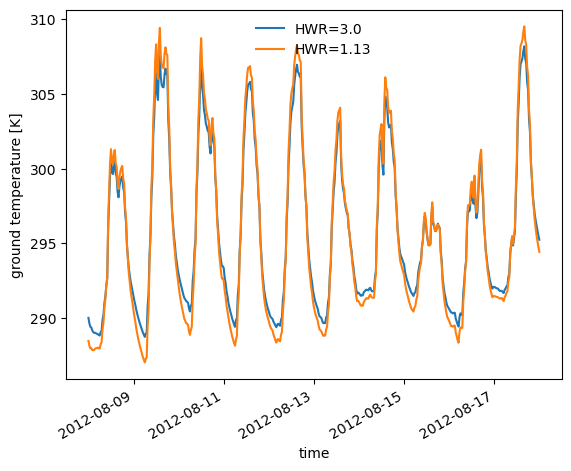

In [16]:
import matplotlib.pyplot as plt
ds1 = o.nc_view(replace[0])
ds1['TG'].plot(label="HWR=3.0")
ds0['TG'].plot(label="HWR=1.13")
plt.legend(loc='best', frameon=False)

## 6 run case with our forcing data and surface data

here we used the data provdied by the Urban-PLUMBER project, the AU-Pre sites data

ref: 
1. https://urban-plumber.github.io/AU-Preston/plots/
2. https://essd.copernicus.org/articles/14/5157/2022/

How to adapt the Urban-PLUMBER data to the CLMU forcing input?

Use `nc.sh` to convert

Usage: `bash nc.sh --input <inputfile> --output <outputfile>`

The **surface data** was created using [ctsm tools](https://escomp.github.io/ctsm-docs/versions/release-clm5.0/html/users_guide/using-clm-tools/creating-surface-datasets.html) by Dr. Keith Oleson. Note: It will need lots of data ot create such a surface data. So we offer two way to get the input the surface data. One is `o.check_surf_data(usr_surfdata='usr_surfacedata.nc')`, another is `o.revise_surfdata()`.

The **domain** is same as surface data, can be defined by `o.check_domain_data()`

Assume we get the forcing data, and has the paramters of surface and domain data.

6.1 check the forcing data of AU-Pre site

In [3]:
o.check_forcing_data(usr_forcing="inputfolder/Urban-PLUMBER/datm_files/AU-Pre/CLM1PT_data/CTSM_DATM_AU-Pre_1993-2004.nc")

Copying the file CTSM_DATM_AU-Pre_1993-2004.nc to the /Users/user/Documents/GitHub/pyclmuapp/inputfolder/usp


6.2 revised the surface data

In [7]:
AUPre = {'CANYON_HWR': 0.42, 'HT_ROOF': 6.4,'THICK_ROOF': 0.1469999998807907,'THICK_WALL': 0.2856699824333191,'WTLUNIT_ROOF': 0.445,
'WTROAD_PERV': 0.68,'WALL_TO_PLAN_AREA_RATIO': 0.4,'WIND_HGT_CANYON': 3.2,'NLEV_IMPROAD': 2,
'TK_ROOF': [1.2000000476837158,0.029999999329447746,0.15000000596046448,0.029999999329447746,0.029999999329447746,
            0.029999999329447746,0.03999999910593033,0.03999999910593033,0.03999999910593033,0.1599999964237213],
 'TK_WALL': [2.029510974884033,6.145923137664795,5.849672794342041,6.211590766906738,4.774613857269287,
             0.6582019925117493,4.774613857269287,5.697580814361572,5.849053859710693,1.808137059211731],
 'TK_IMPROAD': [1.6699999570846558,0.5579000115394592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
 'CV_ROOF': [1700000.0,1206.0,994000.0,1206.0,1206.0,1206.0,10080.0,10080.0,10080.0,609000.0],
 'CV_WALL': [1523581.75,1524673.75,166268.59375,917579.125,771964.5,
             770872.625,771964.5,226938.09375,203989.703125,628112.1875],
 'CV_IMPROAD': [2060500.0, 1712300.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'EM_IMPROAD': 0.9700000286102295,
 'EM_PERROAD': 0.9900000095367432,
 'EM_ROOF': 0.9200000166893005,
 'EM_WALL': 0.9700000286102295,
 'ALB_IMPROAD_DIR': [0.15, 0.15],
 'ALB_IMPROAD_DIF': [0.15, 0.15],
 'ALB_PERROAD_DIR': [0.15, 0.15],
 'ALB_PERROAD_DIF': [0.15, 0.15],
 'ALB_ROOF_DIR': [0.21, 0.21],
 'ALB_ROOF_DIF': [0.21, 0.21],
 'ALB_WALL_DIR': [0.21, 0.21],
 'ALB_WALL_DIF': [0.21, 0.21],
 'T_BUILDING_MIN': 290.1000061035156}

In [8]:
o.revise_surfdata(action=AUPre, surfata_name="surface_AUPre.nc")
# the output file is in inputfile/usp/surface_AUPre.nc

6.3 revise the domian data

mainly for the location of the urban

In [12]:
AUPre = {'lat': -37.73, 'lon': 145.01, 'domain_name': "domain_AUPre.nc"}
o.check_domain_data(lat=AUPre['lat'], lon=AUPre['lon'], domain_name=AUPre['domain_name'])

In [13]:
replace = o.run(
            ouptname= "_clm.nc",
            case_name = "AUPre_case", 
            RUN_STARTDATE = "2003-08-08",
            STOP_OPTION = "days", 
            STOP_N = "10",
            #ATM_DOM = None, 
            #SURF = None, 
            #FORCING = None,
            #passward = "None",
            iflog = True,
            logfile = "logAUPre.log",
            run_tyep="usp-exec"#"case", when docker container is not start)
        )
replace

The /Users/user/Documents/GitHub/pyclmuapp/inputfolder/usp/usp.sh already exists.


['/Users/user/Documents/GitHub/pyclmuapp/outputfolder/AUPre_case_clm0_2024-05-09_17-36-45_clm.nc']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


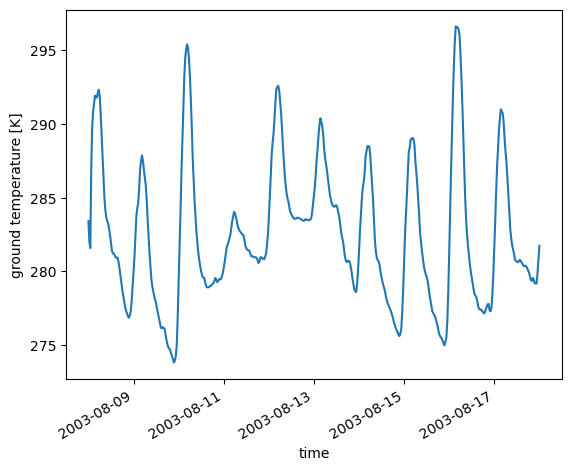

In [14]:
import matplotlib.pyplot as plt
ds_au = o.nc_view(replace[0])
ds_au['TG'].plot()
plt.legend(loc='best', frameon=False)